<a href="https://colab.research.google.com/github/syedsauda/CE888/blob/master/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bank Classification
Import libraries

In [0]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

Load in data

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")
print(df.dtypes)
#Convert non numeric types to numeric
df[["job"]] = df[["job"]].apply(LabelEncoder().fit_transform)
df[["marital"]] = df[["marital"]].apply(LabelEncoder().fit_transform)
df[["education"]] = df[["education"]].apply(LabelEncoder().fit_transform)
df[["default"]] = df[["default"]].apply(LabelEncoder().fit_transform)
df[["housing"]] = df[["housing"]].apply(LabelEncoder().fit_transform)
df[["loan"]] = df[["loan"]].apply(LabelEncoder().fit_transform)
df[["contact"]] = df[["contact"]].apply(LabelEncoder().fit_transform)
df[["month"]] = df[["month"]].apply(LabelEncoder().fit_transform)
df[["day_of_week"]] = df[["day_of_week"]].apply(LabelEncoder().fit_transform)
df[["poutcome"]] = df[["poutcome"]].apply(LabelEncoder().fit_transform)

#print(df.dtypes)



age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


Using a classifier

In [0]:
features = ["age","job","marital","education","default","housing",
            "loan","contact","month","day_of_week","duration",
            "campaign","pdays","previous","poutcome","emp.var.rate",
            "cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

outcomes_of_interest = ["y"]
n_bins = 20

X_df = df[features].copy()
y_df = df[outcomes_of_interest].copy()

y_df[outcomes_of_interest] = y_df[outcomes_of_interest].apply(LabelEncoder().fit_transform)

print(y_df)

X = X_df.values
y = y_df.values.T[0]


       y
0      0
1      0
2      0
3      0
4      0
...   ..
41183  1
41184  0
41185  0
41186  1
41187  0

[41188 rows x 1 columns]


In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=4)
dummy_clf = DummyClassifier()

scores = cross_val_score(clf, X, y, cv=10,scoring=make_scorer(acc))
dummy_scores = cross_val_score(dummy_clf, X, y, cv=10, scoring=make_scorer(acc))
print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f +/- %0.2f" % (dummy_scores.mean(), dummy_scores.std()))



ACC: 0.77 +/- 0.22
Dummy ACC: 0.80 +/- 0.01


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [0]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=4)
clf.fit(X,y)

print(acc(y,clf.predict(X)))

0.9046324172088958


[0 0 0 ... 0 1 0]


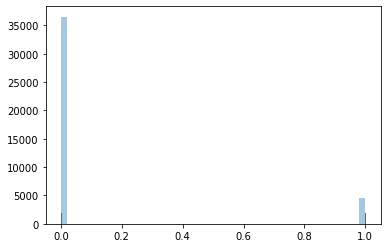

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")
df_dummies = pd.get_dummies(df)
del df_dummies["y_no"]
del df_dummies["duration"]

y_df = df_dummies[["y_yes"]].copy()
y = y_df.values.T[0]
del df_dummies["y_yes"]
print(y)
sns_plot = sns.distplot(y, kde=False, rug=True)

In [0]:
X_df = df_dummies[df_dummies.columns].copy()
X = X_df.values

clf = RandomForestClassifier(n_estimators=1000, max_depth=4)
clf.fit(X,y)

print(acc(y,clf.predict(X)))

0.8989511508206274


In [101]:
dummy_clf = DummyClassifier()

scores = cross_val_score(clf, X, y, cv=10,scoring=make_scorer(acc))
dummy_scores = cross_val_score(dummy_clf, X, y, cv=10, scoring=make_scorer(acc))
print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f +/- %0.2f" % (dummy_scores.mean(), dummy_scores.std()))

ACC: 0.78 +/- 0.22
Dummy ACC: 0.80 +/- 0.00


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Confusion Matrix

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


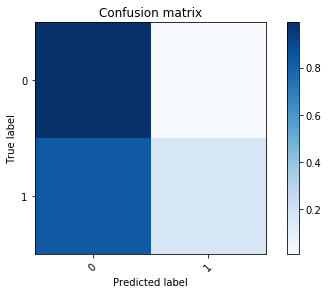

In [103]:
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')